# Brain Tumor Detection
## Single Task Validation - Building multi-lable binary Classifier
Description
This dataset was originally created by Yousef Ghanem. To see the current project, which may have been updated since this version, please go here: https://universe.roboflow.com/yousef-ghanem-jzj4y/brain-tumor-detection-fpf1f.

This dataset is part of RF100, an Intel-sponsored initiative to create a new object detection benchmark for model generalizability.

Access the RF100 Github repo: https://github.com/roboflow-ai/roboflow-100-benchmark

## Imports

In [1]:
# Go to project root folder
import os
os.chdir("../")
%pwd

'/workspaces/brain-tumor-detection'

In [2]:
import numpy as np
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()

import tensorflow as tf
tf.random.set_seed(42)

import matplotlib.pyplot as plt

2025-03-14 13:02:27.970467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741957347.979432  282792 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741957347.981931  282792 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1741957347.993053  282792 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741957347.993067  282792 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741957347.993069  282792 computation_placer.cc:177] computation placer alr

In [3]:
found_gpu = tf.config.list_physical_devices('GPU')
if not found_gpu:
    raise Exception("No GPU found")
found_gpu, tf.__version__

([PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')], '2.19.0')

In [4]:
from src.data_handler.data_loader import DataLoader
from src.data_handler.annotation_processor import AnnotationProcessor
from src.data_handler.preprocessor import Preprocessor

In [5]:
# auto reload dotenv 
%load_ext dotenv
%dotenv

# auto reload libs
%load_ext autoreload
%autoreload 2

## Paths Setup

In [6]:
from hydra import initialize, compose

# https://gist.github.com/bdsaglam/586704a98336a0cf0a65a6e7c247d248

with initialize(version_base=None, config_path="../conf"):
    cfg = compose(config_name="config")
    print(cfg.DATASET_DIRS.TRAIN_DIR)

datasets/-Brain-Tumor-Detection-2/train/


In [7]:
cfg.DATASET_DIRS

{'TRAIN_DIR': '${DATASET.DATASET_DIR}/${DATASET.DATASET_NAME}/train/', 'VALIDATION_DIR': '${DATASET.DATASET_DIR}/${DATASET.DATASET_NAME}/valid', 'TEST_DIR': '${DATASET.DATASET_DIR}/${DATASET.DATASET_NAME}/test'}

In [ ]:
DATASET_DIRS = Path(cfg.DATASET.DATASET_DIR)
TRAIN_DIR = Path(cfg.DATASET_DIRS.TRAIN_DIR)
VALIDATION_DIR = Path(cfg.DATASET_DIRS.VALIDATION_DIR)
TEST_DIR = Path(cfg.DATASET_DIRS.TEST_DIR)


IMG_SIZE = cfg.TRAIN.IMG_SIZE
BATCH_SIZE = cfg.TRAIN.BATCH_SIZE
LOG_DIR = cfg.OUTPUTS.LOG_DIR
CHECK_POINT_DIR = Path(cfg.OUTPUTS.CHECKPOINT_PATH)
class_name_list = [
    'label0',
    'label1',
    'label2'
]
class_map = {k: v for k, v in enumerate(class_name_list)}

NUM_EPOCHS = cfg.TRAIN.NUM_EPOCHS
LEARNING_RATE = cfg.TRAIN.LEARNING_RATE

NUM_CLASSES = len(class_name_list)


## Dataset Download from Roboflow

In [ ]:
if not TRAIN_DIR.exists():
    from roboflow import Roboflow
    rf = Roboflow(api_key="AAjLIN3PenSZ29LjbI3d")
    project = rf.workspace("yousef-ghanem-jzj4y").project("brain-tumor-detection-fpf1f")
    version = project.version(2)
    dataset = version.download("tensorflow")
                        

## Load images from directory

### Load Training datasets

In [ ]:
prepare_train_dataset = AnnotationProcessor(annotation_file= str(TRAIN_DIR/'_annotations.csv'))
_class_map = {v: k for k, v in enumerate(class_name_list)}
train_images, train_class_ids, train_bboxes  = prepare_train_dataset.process_annotations(image_dir=TRAIN_DIR, class_id_map=_class_map)

len(train_images), len(train_class_ids), len(train_bboxes)

(6851, 6851, 6851)

In [11]:
train_class_ids

[[0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1],
 [0, 1, 2],
 [0, 1, 2],
 [1, 2],
 [0, 1],
 [1],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [1, 2],
 [0, 1],
 [2],
 [1],
 [0, 1, 2],
 [1],
 [1],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [0, 1, 2],
 [1, 2],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [0, 1],
 [1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [0, 1, 2],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [1, 2],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1],
 [0, 1, 2],
 [1],
 [0, 1],
 [0, 1, 2],
 [1],
 [1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [1, 2],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [1],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [1],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2]

In [12]:
train_images[0],train_class_ids[0], train_bboxes[0]

('datasets/-Brain-Tumor-Detection-2/train/volume_201_slice_92_jpg.rf.0012bdce7561c3808ed18953dc75060c.jpg',
 [0, 1, 2],
 array([[0.68345324, 0.54545455, 0.95683453, 0.76515152],
        [0.42446043, 0.48484848, 0.99280576, 0.96969697],
        [0.46043165, 0.53030303, 0.99280576, 0.78030303]]))

In [13]:
train_dl = DataLoader(train_images, train_class_ids, train_bboxes)
train_ds = train_dl.load_train_dataset()
train_ds = Preprocessor(train_ds).preprocess()
train_ds = train_ds.batch(BATCH_SIZE)\
                .prefetch(tf.data.AUTOTUNE)

I0000 00:00:1741957362.483815  282792 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7144 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:0a:00.0, compute capability: 8.6


In [14]:
for batch in train_ds.take(1):
    image, cls = batch
    print(image.shape, cls.shape)
    print(cls[5])
    print(image[1].numpy().min(), image[1].numpy().max())
    for c in cls:
        print(c.numpy())

(32, 240, 240, 3) (32, 3)
tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)
-123.68 107.654106
[0. 1. 0.]
[0. 1. 0.]
[1. 1. 1.]
[1. 1. 1.]
[0. 1. 0.]
[1. 1. 1.]
[1. 1. 0.]
[1. 1. 1.]
[0. 1. 0.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[0. 1. 0.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 0.]
[0. 1. 0.]
[1. 1. 1.]
[0. 1. 0.]
[0. 1. 0.]
[1. 1. 1.]
[0. 1. 0.]
[1. 1. 1.]
[1. 1. 0.]
[0. 1. 0.]
[1. 1. 1.]
[1. 1. 1.]
[0. 1. 0.]
[1. 1. 1.]
[1. 1. 1.]
[0. 1. 0.]


2025-03-14 13:02:49.504794: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Validation datasets 

In [15]:
prepare_valid_dataset = AnnotationProcessor(annotation_file= str(VALIDATION_DIR/'_annotations.csv'))

valid_image_paths, valid_class_ids, valid_bboxes  = prepare_valid_dataset.process_annotations(image_dir=VALIDATION_DIR, class_id_map=_class_map)
len(valid_image_paths), len(valid_class_ids), len(valid_bboxes)

(1963, 1963, 1963)

In [16]:
valid_dl = DataLoader(valid_image_paths, valid_class_ids, valid_bboxes).load_val_dataset()
valid_ds = Preprocessor(valid_dl).preprocess()
valid_ds = valid_ds.batch(BATCH_SIZE)\
                .prefetch(tf.data.AUTOTUNE)

In [17]:
for batch in valid_ds.take(1):
    image, cls, = batch
    print(cls.shape)
    print(image.shape)
    print(image[1].numpy().min(), image[1].numpy().max())

(32, 3)
(32, 240, 240, 3)
-123.68 138.49847


2025-03-14 13:02:50.830981: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Training Setup

In [18]:
METRICS = [
    'binary_accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='AUC', multi_label=True), 
    tf.keras.metrics.F1Score(name='f1_score',average='weighted'),
]

### Define  Callbacks

In [ ]:
import os

to_monitor = 'val_AUC'
mode = 'max'
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, 
                                            patience=5, 
                                            monitor=to_monitor,
                                            mode=mode,
                                            min_lr=1e-8,
                                            verbose=1),

    tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(str(CHECK_POINT_DIR), "classifier_ckpt_{epoch}.keras") ,
                                        save_weights_only=False,
                                        save_best_only=True,
                                        monitor=to_monitor,
                                        mode=mode,
                                        verbose=1),
                                        
    tf.keras.callbacks.EarlyStopping(monitor=to_monitor, 
                                    patience=10,
                                    mode=mode, 
                                    restore_best_weights=True,
                                    verbose=1),

]

## Define loss

In [20]:
padded_class_ids = train_dl.multi_hot_class_ids
padded_class_ids[:10]

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [21]:
from src.losses import binary_weighted_loss as _loss

positive_weights, negative_weights = _loss.compute_class_weights(padded_class_ids)
positive_weights, negative_weights 

(array([0.38140417, 0.01547219, 0.40767771]),
 array([0.61859584, 0.9845278 , 0.5923223 ], dtype=float32))

### Define Optimizer

In [22]:
optimizer=tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE)

## Define ResNet50 Model Classifier

In [23]:
from src.models.resnet101 import resnet101_classifier
tf.keras.backend.clear_session()

model = resnet101_classifier(input_shape=(IMG_SIZE,IMG_SIZE,3), num_classes=NUM_CLASSES)

model.summary()

Total layers in ResNet101: 345
Unfreezing the last 172 layers (50% of total layers)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 246, 246,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 120, 120,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 120, 120,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 120, 120,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 122, 122,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 60, 60,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 60, 60,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 60, 60,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 60, 60,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 60, 60,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 60, 60,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 60, 60,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 60, 60,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 60, 60,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 60, 60,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 60, 60,    │      1,024 │ conv2_block1_3_c

 Total params: 44,759,427 (170.74 MB)

 Trainable params: 32,739,331 (124.89 MB)

 Non-trainable params: 12,020,096 (45.85 MB)

## Model Building and Compilation

In [24]:
model.compile(
    optimizer=optimizer,
    loss=_loss.set_binary_crossentropy_weighted_loss(positive_weights, negative_weights),
    metrics=METRICS)  

## Train and Validate the model

In [25]:
import keras

class LearningRateFinder(keras.callbacks.Callback):
    def __init__(self, start_lr=1e-6, end_lr=1e-1, num_epochs=5):
        super().__init__()
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.num_epochs = num_epochs
        self.lrs = []
        self.losses = []

    def on_train_begin(self, logs=None):
        self.lrs = []
        self.losses = []
        self.iteration = 0
        self.lr = self.start_lr

    def on_train_batch_end(self, batch, logs=None):
        self.lrs.append(self.lr)
        self.losses.append(logs['loss'])
        self.iteration += 1

        # Calculate the new learning rate (linear increase for simplicity)
        self.lr = self.start_lr + (self.end_lr - self.start_lr) * (self.iteration / (self.params['steps'] * self.num_epochs))
        # Update the learning rate (handle SGD and Adam)

        optimizer.learning_rate.assign(self.lr)


    def plot_lrs(self):
        import matplotlib.pyplot as plt
        plt.plot(self.lrs, self.losses)
        plt.xscale('log')
        plt.xlabel('Learning Rate')
        plt.ylabel('Loss')
        plt.show()

In [26]:
# Assuming your model, optimizer, and data are already defined

# Instantiate the LearningRateFinder callback
# lr_finder = LearningRateFinder(start_lr=1e-6, end_lr=1e-1, num_epochs=5) # Adjust num_epochs as needed

# # Train the model with the callback
# model.fit(
#     train_ds, # your training data
#     epochs=lr_finder.num_epochs,
#     callbacks=[lr_finder]
# )

# # Plot the results
# lr_finder.plot_lrs()

In [27]:
import mlflow

mlflow.set_experiment("/brain-tumor-resnet101_classifier")
mlflow.tensorflow.autolog(log_models=True, 
                          log_datasets=False, 
                          log_input_examples=True,
                          keras_model_kwargs={"save_format": "keras"},
                          checkpoint_monitor=to_monitor, 
                          checkpoint_mode=mode)

history = model.fit(
    train_ds,
    epochs=NUM_EPOCHS,
    validation_data=valid_ds,
    batch_size=BATCH_SIZE,
    callbacks=[callbacks],
)

2025/03/14 13:02:55 WARNING mlflow.utils.autologging_utils: MLflow tensorflow autologging is known to be compatible with 2.7.4 <= tensorflow <= 2.18.0, but the installed version is 2.19.0. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a compatible version, or try upgrading MLflow.
2025/03/14 13:02:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5312d8cc59b6451188a86fc8000cc030', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/50


I0000 00:00:1741957401.819879  283058 service.cc:152] XLA service 0x7dea1c003570 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741957401.819957  283058 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-03-14 13:03:22.581822: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741957406.092438  283058 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1741957416.360524  283058 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - AUC: 0.6381 - binary_accuracy: 0.6083 - f1_score: 0.5086 - loss: 0.6986 - precision: 0.8170 - recall: 0.5960
Epoch 1: val_AUC improved from -inf to 0.81360, saving model to output/checkpoints/classifier_ckpt_1.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 91s 235ms/step - AUC: 0.6385 - binary_accuracy: 0.6086 - f1_score: 0.5087 - loss: 0.6983 - precision: 0.8172 - recall: 0.5962 - val_AUC: 0.8136 - val_binary_accuracy: 0.6570 - val_f1_score: 0.5193 - val_loss: 0.5660 - val_precision: 0.8992 - val_recall: 0.6068 - learning_rate: 1.0000e-04
Epoch 2/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - AUC: 0.8066 - binary_accuracy: 0.7175 - f1_score: 0.5530 - loss: 0.5468 - precision: 0.9062 - recall: 0.6816
Epoch 2: val_AUC improved from 0.81360 to 0.85596, saving model to output/checkpoints/classifier_ckpt_2.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 146ms/step - AUC: 0.8069 - binary_accuracy: 0.7177 - f1_score: 0.5530 - loss: 0.5466 - precision: 0.9063 - recall: 0.6819 - val_AUC: 0.8560 - val_binary_accuracy: 0.6920 - val_f1_score: 0.5766 - val_loss: 0.5561 - val_precision: 0.9655 - val_recall: 0.6075 - learning_rate: 1.0000e-04
Epoch 3/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - AUC: 0.8820 - binary_accuracy: 0.7881 - f1_score: 0.5751 - loss: 0.4582 - precision: 0.9368 - recall: 0.7646
Epoch 3: val_AUC did not improve from 0.85596
215/215 ━━━━━━━━━━━━━━━━━━━━ 35s 136ms/step - AUC: 0.8819 - binary_accuracy: 0.7882 - f1_score: 0.5751 - loss: 0.4583 - precision: 0.9368 - recall: 0.7647 - val_AUC: 0.8457 - val_binary_accuracy: 0.7419 - val_f1_score: 0.5785 - val_loss: 0.5454 - val_precision: 0.9598 - val_recall: 0.6815 - learning_rate: 1.0000e-04
Epoch 4/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - AUC: 0.8965 - binary_accuracy: 0.8215 - f1_score: 0.5886 - loss: 0.4126 - precision: 0.9422 - rec

215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 145ms/step - AUC: 0.8965 - binary_accuracy: 0.8215 - f1_score: 0.5886 - loss: 0.4125 - precision: 0.9423 - recall: 0.8040 - val_AUC: 0.8743 - val_binary_accuracy: 0.7944 - val_f1_score: 0.5744 - val_loss: 0.5338 - val_precision: 0.9712 - val_recall: 0.7457 - learning_rate: 1.0000e-04
Epoch 5/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - AUC: 0.9171 - binary_accuracy: 0.8456 - f1_score: 0.5966 - loss: 0.3542 - precision: 0.9569 - recall: 0.8256
Epoch 5: val_AUC improved from 0.87434 to 0.88347, saving model to output/checkpoints/classifier_ckpt_5.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 145ms/step - AUC: 0.9172 - binary_accuracy: 0.8455 - f1_score: 0.5965 - loss: 0.3543 - precision: 0.9569 - recall: 0.8255 - val_AUC: 0.8835 - val_binary_accuracy: 0.7448 - val_f1_score: 0.5704 - val_loss: 0.5415 - val_precision: 0.9690 - val_recall: 0.6785 - learning_rate: 1.0000e-04
Epoch 6/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - AUC: 0.9242 - binary_accuracy: 0.8544 - f1_score: 0.5989 - loss: 0.3208 - precision: 0.9623 - recall: 0.8333
Epoch 6: val_AUC improved from 0.88347 to 0.88928, saving model to output/checkpoints/classifier_ckpt_6.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 140ms/step - AUC: 0.9243 - binary_accuracy: 0.8544 - f1_score: 0.5989 - loss: 0.3209 - precision: 0.9623 - recall: 0.8333 - val_AUC: 0.8893 - val_binary_accuracy: 0.8421 - val_f1_score: 0.5736 - val_loss: 0.4663 - val_precision: 0.9234 - val_recall: 0.8589 - learning_rate: 1.0000e-04
Epoch 7/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - AUC: 0.9473 - binary_accuracy: 0.8717 - f1_score: 0.6042 - loss: 0.3051 - precision: 0.9700 - recall: 0.8504
Epoch 7: val_AUC improved from 0.88928 to 0.89318, saving model to output/checkpoints/classifier_ckpt_7.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - AUC: 0.9473 - binary_accuracy: 0.8718 - f1_score: 0.6042 - loss: 0.3050 - precision: 0.9699 - recall: 0.8505 - val_AUC: 0.8932 - val_binary_accuracy: 0.8373 - val_f1_score: 0.5745 - val_loss: 0.4743 - val_precision: 0.9421 - val_recall: 0.8324 - learning_rate: 1.0000e-04
Epoch 8/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - AUC: 0.9623 - binary_accuracy: 0.9010 - f1_score: 0.6056 - loss: 0.2611 - precision: 0.9682 - recall: 0.8928
Epoch 8: val_AUC did not improve from 0.89318
215/215 ━━━━━━━━━━━━━━━━━━━━ 33s 128ms/step - AUC: 0.9623 - binary_accuracy: 0.9009 - f1_score: 0.6056 - loss: 0.2612 - precision: 0.9682 - recall: 0.8928 - val_AUC: 0.8865 - val_binary_accuracy: 0.8010 - val_f1_score: 0.5907 - val_loss: 0.5358 - val_precision: 0.9718 - val_recall: 0.7543 - learning_rate: 1.0000e-04
Epoch 9/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - AUC: 0.9718 - binary_accuracy: 0.9070 - f1_score: 0.6057 - loss: 0.2325 - precision: 0.9719 - rec

215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 143ms/step - AUC: 0.9718 - binary_accuracy: 0.9070 - f1_score: 0.6057 - loss: 0.2326 - precision: 0.9719 - recall: 0.8994 - val_AUC: 0.9006 - val_binary_accuracy: 0.7959 - val_f1_score: 0.5860 - val_loss: 0.6047 - val_precision: 0.9889 - val_recall: 0.7338 - learning_rate: 1.0000e-04
Epoch 10/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - AUC: 0.9599 - binary_accuracy: 0.9091 - f1_score: 0.6001 - loss: 0.2198 - precision: 0.9763 - recall: 0.8978
Epoch 10: val_AUC did not improve from 0.90058
215/215 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step - AUC: 0.9600 - binary_accuracy: 0.9091 - f1_score: 0.6002 - loss: 0.2197 - precision: 0.9763 - recall: 0.8978 - val_AUC: 0.8843 - val_binary_accuracy: 0.8214 - val_f1_score: 0.5918 - val_loss: 0.4792 - val_precision: 0.9722 - val_recall: 0.7822 - learning_rate: 1.0000e-04
Epoch 11/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - AUC: 0.9787 - binary_accuracy: 0.9230 - f1_score: 0.6146 - loss: 0.1960 - precision: 0.9800 - 

215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - AUC: 0.9787 - binary_accuracy: 0.9230 - f1_score: 0.6146 - loss: 0.1960 - precision: 0.9800 - recall: 0.9133 - val_AUC: 0.9022 - val_binary_accuracy: 0.8782 - val_f1_score: 0.5876 - val_loss: 0.4636 - val_precision: 0.9455 - val_recall: 0.8874 - learning_rate: 1.0000e-04
Epoch 12/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - AUC: 0.9795 - binary_accuracy: 0.9294 - f1_score: 0.6116 - loss: 0.1861 - precision: 0.9798 - recall: 0.9231
Epoch 12: val_AUC did not improve from 0.90223
215/215 ━━━━━━━━━━━━━━━━━━━━ 34s 132ms/step - AUC: 0.9795 - binary_accuracy: 0.9294 - f1_score: 0.6116 - loss: 0.1861 - precision: 0.9798 - recall: 0.9231 - val_AUC: 0.9002 - val_binary_accuracy: 0.8370 - val_f1_score: 0.5933 - val_loss: 0.5225 - val_precision: 0.9787 - val_recall: 0.7982 - learning_rate: 1.0000e-04
Epoch 13/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - AUC: 0.9838 - binary_accuracy: 0.9370 - f1_score: 0.6113 - loss: 0.1693 - precision: 0.9780 - 

215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - AUC: 0.9730 - binary_accuracy: 0.9097 - f1_score: 0.6127 - loss: 0.1914 - precision: 0.9770 - recall: 0.8975 - val_AUC: 0.9050 - val_binary_accuracy: 0.8592 - val_f1_score: 0.5765 - val_loss: 0.4983 - val_precision: 0.9549 - val_recall: 0.8509 - learning_rate: 1.0000e-04
Epoch 17/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - AUC: 0.9831 - binary_accuracy: 0.9504 - f1_score: 0.6207 - loss: 0.1236 - precision: 0.9859 - recall: 0.9454
Epoch 17: val_AUC did not improve from 0.90499
215/215 ━━━━━━━━━━━━━━━━━━━━ 34s 131ms/step - AUC: 0.9832 - binary_accuracy: 0.9504 - f1_score: 0.6207 - loss: 0.1236 - precision: 0.9859 - recall: 0.9454 - val_AUC: 0.8981 - val_binary_accuracy: 0.8516 - val_f1_score: 0.5798 - val_loss: 0.4277 - val_precision: 0.9290 - val_recall: 0.8667 - learning_rate: 1.0000e-04
Epoch 18/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - AUC: 0.9901 - binary_accuracy: 0.9597 - f1_score: 0.6159 - loss: 0.1115 - precision: 0.9861 - 

215/215 ━━━━━━━━━━━━━━━━━━━━ 38s 149ms/step - AUC: 0.9902 - binary_accuracy: 0.9597 - f1_score: 0.6160 - loss: 0.1115 - precision: 0.9861 - recall: 0.9587 - val_AUC: 0.9098 - val_binary_accuracy: 0.8455 - val_f1_score: 0.5591 - val_loss: 0.5171 - val_precision: 0.9521 - val_recall: 0.8342 - learning_rate: 1.0000e-04
Epoch 19/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - AUC: 0.9939 - binary_accuracy: 0.9618 - f1_score: 0.6122 - loss: 0.1097 - precision: 0.9859 - recall: 0.9621
Epoch 19: val_AUC did not improve from 0.90975
215/215 ━━━━━━━━━━━━━━━━━━━━ 35s 136ms/step - AUC: 0.9939 - binary_accuracy: 0.9618 - f1_score: 0.6123 - loss: 0.1097 - precision: 0.9859 - recall: 0.9620 - val_AUC: 0.8674 - val_binary_accuracy: 0.8248 - val_f1_score: 0.5948 - val_loss: 0.8184 - val_precision: 0.9799 - val_recall: 0.7804 - learning_rate: 1.0000e-04
Epoch 20/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - AUC: 0.9876 - binary_accuracy: 0.9474 - f1_score: 0.6011 - loss: 0.1459 - precision: 0.9828 - 

215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - AUC: 0.9866 - binary_accuracy: 0.9586 - f1_score: 0.6075 - loss: 0.1025 - precision: 0.9867 - recall: 0.9564 - val_AUC: 0.9156 - val_binary_accuracy: 0.8917 - val_f1_score: 0.5828 - val_loss: 0.4407 - val_precision: 0.9500 - val_recall: 0.9018 - learning_rate: 1.0000e-04
Epoch 22/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - AUC: 0.9939 - binary_accuracy: 0.9658 - f1_score: 0.6177 - loss: 0.0895 - precision: 0.9894 - recall: 0.9632
Epoch 22: val_AUC did not improve from 0.91558
215/215 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - AUC: 0.9939 - binary_accuracy: 0.9658 - f1_score: 0.6177 - loss: 0.0895 - precision: 0.9894 - recall: 0.9632 - val_AUC: 0.9137 - val_binary_accuracy: 0.8913 - val_f1_score: 0.5979 - val_loss: 0.5305 - val_precision: 0.9543 - val_recall: 0.8968 - learning_rate: 1.0000e-04
Epoch 23/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - AUC: 0.9933 - binary_accuracy: 0.9720 - f1_score: 0.6231 - loss: 0.0771 - precision: 0.9922 - 

215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 144ms/step - AUC: 0.9940 - binary_accuracy: 0.9753 - f1_score: 0.6217 - loss: 0.0703 - precision: 0.9920 - recall: 0.9743 - val_AUC: 0.9216 - val_binary_accuracy: 0.8944 - val_f1_score: 0.5903 - val_loss: 0.4792 - val_precision: 0.9333 - val_recall: 0.9240 - learning_rate: 1.0000e-04
Epoch 27/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - AUC: 0.9867 - binary_accuracy: 0.9715 - f1_score: 0.6238 - loss: 0.0841 - precision: 0.9912 - recall: 0.9696
Epoch 27: val_AUC did not improve from 0.92162
215/215 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - AUC: 0.9868 - binary_accuracy: 0.9715 - f1_score: 0.6238 - loss: 0.0841 - precision: 0.9912 - recall: 0.9696 - val_AUC: 0.8444 - val_binary_accuracy: 0.7322 - val_f1_score: 0.5751 - val_loss: 0.5539 - val_precision: 0.9279 - val_recall: 0.6938 - learning_rate: 1.0000e-04
Epoch 28/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - AUC: 0.9792 - binary_accuracy: 0.9566 - f1_score: 0.6230 - loss: 0.1040 - precision: 0.9861 - 

215/215 ━━━━━━━━━━━━━━━━━━━━ 38s 148ms/step - AUC: 0.9937 - binary_accuracy: 0.9845 - f1_score: 0.6254 - loss: 0.0488 - precision: 0.9961 - recall: 0.9828 - val_AUC: 0.9248 - val_binary_accuracy: 0.8961 - val_f1_score: 0.6033 - val_loss: 0.4881 - val_precision: 0.9584 - val_recall: 0.8993 - learning_rate: 1.0000e-05
Epoch 33/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - AUC: 0.9988 - binary_accuracy: 0.9831 - f1_score: 0.6221 - loss: 0.0416 - precision: 0.9963 - recall: 0.9805
Epoch 33: val_AUC improved from 0.92478 to 0.92565, saving model to output/checkpoints/classifier_ckpt_33.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - AUC: 0.9988 - binary_accuracy: 0.9831 - f1_score: 0.6221 - loss: 0.0416 - precision: 0.9963 - recall: 0.9806 - val_AUC: 0.9257 - val_binary_accuracy: 0.8990 - val_f1_score: 0.6012 - val_loss: 0.4886 - val_precision: 0.9599 - val_recall: 0.9018 - learning_rate: 1.0000e-05
Epoch 34/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - AUC: 0.9930 - binary_accuracy: 0.9853 - f1_score: 0.6244 - loss: 0.0349 - precision: 0.9965 - recall: 0.9834
Epoch 34: val_AUC did not improve from 0.92565
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 135ms/step - AUC: 0.9931 - binary_accuracy: 0.9853 - f1_score: 0.6244 - loss: 0.0349 - precision: 0.9965 - recall: 0.9834 - val_AUC: 0.9243 - val_binary_accuracy: 0.9000 - val_f1_score: 0.6020 - val_loss: 0.5068 - val_precision: 0.9654 - val_recall: 0.8977 - learning_rate: 1.0000e-05
Epoch 35/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - AUC: 0.9994 - binary_accuracy: 0.9883 - f1_score: 0.6249 - loss: 0.0320 - precision: 0.9966 - 

215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 150ms/step - AUC: 0.9994 - binary_accuracy: 0.9883 - f1_score: 0.6248 - loss: 0.0320 - precision: 0.9966 - recall: 0.9873 - val_AUC: 0.9295 - val_binary_accuracy: 0.9061 - val_f1_score: 0.6034 - val_loss: 0.4818 - val_precision: 0.9621 - val_recall: 0.9096 - learning_rate: 1.0000e-05
Epoch 36/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - AUC: 0.9933 - binary_accuracy: 0.9891 - f1_score: 0.6260 - loss: 0.0277 - precision: 0.9983 - recall: 0.9869
Epoch 36: val_AUC did not improve from 0.92952
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 139ms/step - AUC: 0.9933 - binary_accuracy: 0.9892 - f1_score: 0.6260 - loss: 0.0277 - precision: 0.9983 - recall: 0.9869 - val_AUC: 0.9232 - val_binary_accuracy: 0.9066 - val_f1_score: 0.6037 - val_loss: 0.5134 - val_precision: 0.9659 - val_recall: 0.9064 - learning_rate: 1.0000e-05
Epoch 37/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - AUC: 0.9995 - binary_accuracy: 0.9910 - f1_score: 0.6255 - loss: 0.0234 - precision: 0.9986 - 

215/215 ━━━━━━━━━━━━━━━━━━━━ 38s 148ms/step - AUC: 0.9996 - binary_accuracy: 0.9912 - f1_score: 0.6242 - loss: 0.0241 - precision: 0.9983 - recall: 0.9897 - val_AUC: 0.9303 - val_binary_accuracy: 0.9153 - val_f1_score: 0.6013 - val_loss: 0.5127 - val_precision: 0.9599 - val_recall: 0.9247 - learning_rate: 1.0000e-05
Epoch 41/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - AUC: 0.9993 - binary_accuracy: 0.9930 - f1_score: 0.6196 - loss: 0.0258 - precision: 0.9985 - recall: 0.9920
Epoch 41: val_AUC improved from 0.93025 to 0.93248, saving model to output/checkpoints/classifier_ckpt_41.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - AUC: 0.9993 - binary_accuracy: 0.9930 - f1_score: 0.6196 - loss: 0.0258 - precision: 0.9985 - recall: 0.9920 - val_AUC: 0.9325 - val_binary_accuracy: 0.9109 - val_f1_score: 0.6028 - val_loss: 0.5273 - val_precision: 0.9637 - val_recall: 0.9146 - learning_rate: 1.0000e-05
Epoch 42/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - AUC: 0.9965 - binary_accuracy: 0.9927 - f1_score: 0.6214 - loss: 0.0221 - precision: 0.9982 - recall: 0.9918
Epoch 42: val_AUC improved from 0.93248 to 0.93357, saving model to output/checkpoints/classifier_ckpt_42.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 154ms/step - AUC: 0.9965 - binary_accuracy: 0.9927 - f1_score: 0.6214 - loss: 0.0221 - precision: 0.9982 - recall: 0.9918 - val_AUC: 0.9336 - val_binary_accuracy: 0.9088 - val_f1_score: 0.6034 - val_loss: 0.5383 - val_precision: 0.9631 - val_recall: 0.9123 - learning_rate: 1.0000e-05
Epoch 43/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - AUC: 0.9982 - binary_accuracy: 0.9929 - f1_score: 0.6238 - loss: 0.0191 - precision: 0.9980 - recall: 0.9923
Epoch 43: val_AUC improved from 0.93357 to 0.93423, saving model to output/checkpoints/classifier_ckpt_43.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - AUC: 0.9982 - binary_accuracy: 0.9929 - f1_score: 0.6238 - loss: 0.0191 - precision: 0.9980 - recall: 0.9923 - val_AUC: 0.9342 - val_binary_accuracy: 0.9093 - val_f1_score: 0.5952 - val_loss: 0.5612 - val_precision: 0.9643 - val_recall: 0.9119 - learning_rate: 1.0000e-05
Epoch 44/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - AUC: 0.9998 - binary_accuracy: 0.9947 - f1_score: 0.6249 - loss: 0.0170 - precision: 0.9990 - recall: 0.9937
Epoch 44: val_AUC improved from 0.93423 to 0.93565, saving model to output/checkpoints/classifier_ckpt_44.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - AUC: 0.9998 - binary_accuracy: 0.9947 - f1_score: 0.6249 - loss: 0.0171 - precision: 0.9990 - recall: 0.9937 - val_AUC: 0.9356 - val_binary_accuracy: 0.9102 - val_f1_score: 0.6083 - val_loss: 0.5394 - val_precision: 0.9657 - val_recall: 0.9116 - learning_rate: 1.0000e-05
Epoch 45/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - AUC: 0.9982 - binary_accuracy: 0.9941 - f1_score: 0.6282 - loss: 0.0182 - precision: 0.9992 - recall: 0.9926
Epoch 45: val_AUC improved from 0.93565 to 0.93815, saving model to output/checkpoints/classifier_ckpt_45.keras


215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - AUC: 0.9982 - binary_accuracy: 0.9941 - f1_score: 0.6282 - loss: 0.0182 - precision: 0.9992 - recall: 0.9926 - val_AUC: 0.9381 - val_binary_accuracy: 0.9193 - val_f1_score: 0.5977 - val_loss: 0.5387 - val_precision: 0.9621 - val_recall: 0.9281 - learning_rate: 1.0000e-05
Epoch 46/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - AUC: 0.9951 - binary_accuracy: 0.9943 - f1_score: 0.6279 - loss: 0.0180 - precision: 0.9988 - recall: 0.9934
Epoch 46: val_AUC did not improve from 0.93815
215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 140ms/step - AUC: 0.9951 - binary_accuracy: 0.9943 - f1_score: 0.6279 - loss: 0.0180 - precision: 0.9988 - recall: 0.9934 - val_AUC: 0.9327 - val_binary_accuracy: 0.9097 - val_f1_score: 0.6062 - val_loss: 0.5632 - val_precision: 0.9677 - val_recall: 0.9089 - learning_rate: 1.0000e-05
Epoch 47/50
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - AUC: 0.9998 - binary_accuracy: 0.9937 - f1_score: 0.6258 - loss: 0.0184 - precision: 0.9983 - 

2025/03/14 13:34:04 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp5e0nr513/model, flavor: tensorflow). Fall back to return ['tensorflow==2.19.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/03/14 13:34:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


## Training Visualization

In [ ]:
from src.utils.utils import visualize_training_results

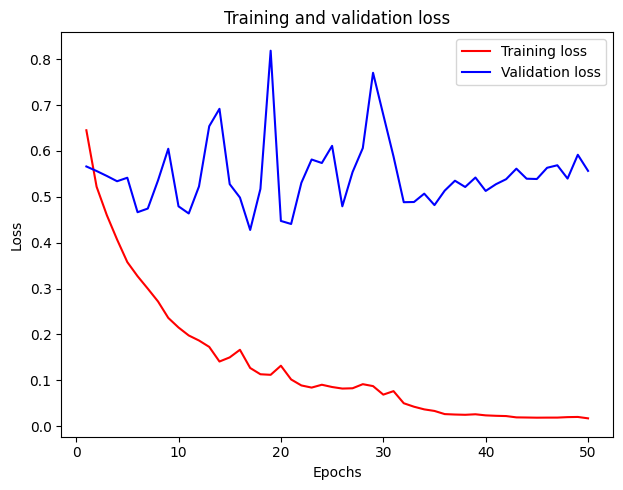

In [30]:
visualize_training_results(history.history)

## Model Evaluation

### Testing Datasets setup

In [ ]:

prepare_test_dataset = AnnotationProcessor(annotation_file= str(TEST_DIR/'_annotations.csv'))
_class_map = {v: k for k, v in enumerate(class_name_list)}
test_image_paths, test_class_ids, test_bboxes = prepare_test_dataset.process_annotations(image_dir=TEST_DIR, class_id_map=_class_map)

len(test_image_paths), len(test_class_ids), len(test_bboxes)

(973, 973, 973)

In [39]:
test_dl = DataLoader(test_image_paths, test_class_ids, test_bboxes, img_size=IMG_SIZE)
test_ds = test_dl.load_val_dataset()
y_true = test_dl.multi_hot_class_ids.astype('int')
test_ds = Preprocessor(test_ds).preprocess()
test_ds = test_ds.batch(BATCH_SIZE)\
                .prefetch(tf.data.AUTOTUNE)

In [40]:
results = model.evaluate(test_ds,return_dict=True)
mlflow.log_metrics(results)
print("Testing accuracy: ", results)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.8871 - binary_accuracy: 0.9025 - f1_score: 0.6206 - loss: 0.5860 - precision: 0.9489 - recall: 0.9130
Testing accuracy:  {'AUC': 0.9407873153686523, 'binary_accuracy': 0.9085303544998169, 'f1_score': 0.6124647259712219, 'loss': 0.5664734244346619, 'precision': 0.953132688999176, 'recall': 0.9182509779930115}


In [41]:
from sklearn.metrics import classification_report

y_prob_pred = model.predict(test_ds)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


In [42]:
y_true


array([[1, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [35]:
y_pred = (y_prob_pred>0.5).astype(int)
y_pred

array([[1, 1, 1],
       [0, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [ ]:
report = classification_report(y_true, y_pred, labels=[0,1,2], target_names=class_name_list)
print(report)

              precision    recall  f1-score   support

      label0       0.90      0.89      0.90       588
      label1       0.99      0.99      0.99       962
      label2       0.93      0.83      0.88       554

   micro avg       0.95      0.92      0.94      2104
   macro avg       0.94      0.90      0.92      2104
weighted avg       0.95      0.92      0.93      2104
 samples avg       0.95      0.93      0.92      2104



/code/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import json

report_json = json.dumps(report, indent=2)
with open("classification_report.json", "w") as f:
    f.write(report_json)

mlflow.log_artifact("classification_report.json")

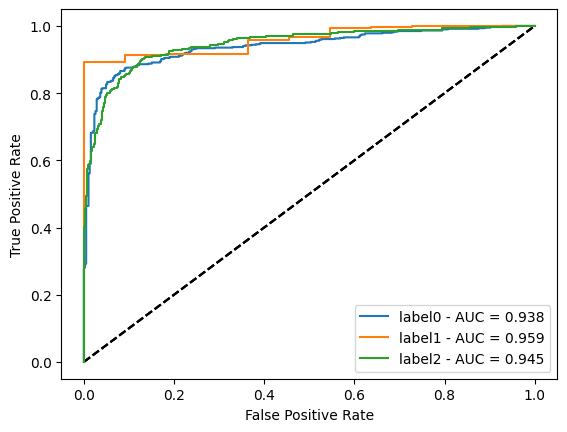

In [ ]:
from src.utils.utils import plot_ROC

plot_ROC(cfg, class_name_list, y_true, y_prob_pred)
